In [4]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
x_train=train_datagen.flow_from_directory(r"Animal_Dataset/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1238 images belonging to 4 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"Animal_Dataset/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [10]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(300,activation='relu'))

In [17]:
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\akash\AppData\Local\Temp\ipykernel_5064\234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
52/52 [==============================] - 20s 350ms/step - loss: 1.4875 - accuracy: 0.4297 - val_loss: 1.1060 - val_accuracy: 0.5092
Epoch 2/10
52/52 [==============================] - 9s 164ms/step - loss: 0.9658 - accuracy: 0.5945 - val_loss: 0.7985 - val_accuracy: 0.7117
Epoch 3/10
52/52 [==============================] - 8s 162ms/step - loss: 0.8062 - accuracy: 0.6777 - val_loss: 0.6743 - val_accuracy: 0.7423
Epoch 4/10
52/52 [==============================] - 8s 162ms/step - loss: 0.6820 - accuracy: 0.7351 - val_loss: 0.5825 - val_accuracy: 0.7454
Epoch 5/10
52/52 [==============================] - 8s 161ms/step - loss: 0.6098 - accuracy: 0.7569 - val_loss: 0.4208 - val_accuracy: 0.8589
Epoch 6/10
52/52 [==============================] - 8s 163ms/step - loss: 0.5541 - accuracy: 0.7819 - val_loss: 0.5214 - val_accuracy: 0.7945
Epoch 7/10
52/52 [==============================] - 9s 169ms/step - loss: 0.4796 - accuracy: 0.8166 - val_loss: 0.4000 - val_accuracy: 0.8282
Epoch

In [20]:
model.save('animal.h5')

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('animal.h5')

In [23]:
img=image.load_img(r"Animal_Dataset/dataset/Testing/elephants/images (43).jpeg",target_size=(64,64))

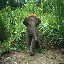

In [24]:
img

In [25]:
x=image.img_to_array(img)

In [26]:
x

array([[[ 40.,  60.,  51.],
        [ 35.,  55.,  46.],
        [ 16.,  36.,  27.],
        ...,
        [ 70., 112.,  48.],
        [ 60., 101.,  45.],
        [ 68., 105.,  61.]],

       [[  9.,  29.,  20.],
        [ 21.,  41.,  32.],
        [ 67.,  87.,  78.],
        ...,
        [ 66., 108.,  44.],
        [ 58.,  99.,  43.],
        [ 81., 117.,  79.]],

       [[ 16.,  36.,  25.],
        [ 34.,  54.,  43.],
        [ 29.,  49.,  38.],
        ...,
        [ 44.,  86.,  22.],
        [ 51.,  91.,  39.],
        [119., 157., 106.]],

       ...,

       [[103.,  99.,  88.],
        [102.,  99.,  84.],
        [115., 112.,  95.],
        ...,
        [113., 110.,  93.],
        [123., 121., 106.],
        [129., 124., 105.]],

       [[ 54.,  49.,  45.],
        [ 53.,  48.,  42.],
        [ 83.,  79.,  70.],
        ...,
        [129., 123., 109.],
        [107., 103.,  91.],
        [109., 104.,  85.]],

       [[ 61.,  69.,  56.],
        [ 76.,  81.,  75.],
        [ 92.,  

In [27]:
x.ndim

3

In [28]:
x=np.expand_dims(x,axis=0)

In [29]:
x.ndim

4

# Testing our Model

In [30]:
pred=np.argmax(model.predict(x),axis=1)
pred

1/1 [==============================] - 0s 164ms/step


array([2], dtype=int64)

In [31]:
index=['bears', 'crows', 'elephants', 'rats']

In [32]:
index[pred[0]]

'elephants'

In [34]:
img1=image.load_img(r"Animal_Dataset/dataset/Testing/bears/k4 (78).jpg",target_size=(64,64))
y=image.img_to_array(img1)
y=np.expand_dims(y,axis=0)
pred=np.argmax(model.predict(y),axis=1)
index=['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

1/1 [==============================] - 0s 41ms/step
bears


In [35]:
img=image.load_img(r"Animal_Dataset/dataset/Testing/rats/images (44).jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

1/1 [==============================] - 0s 42ms/step
rats


In [ ]:
#here the model is giving correct prediction and accuracy of our model is good :)